<a href="https://colab.research.google.com/github/rithikavishwanath/number_classification_using_CNN/blob/main/number_clssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D, Flatten 
import matplotlib.pyplot as plt
import numpy as np 

importing the data provided by keras, this data contains numbers from 0 to 9


In [102]:
# tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [103]:
(x_train, y_train), (x_test, y_test )= keras.datasets.mnist.load_data()

In [104]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [105]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [106]:
x_train.shape

(60000, 28, 28)

In [107]:
y_train[0]

5

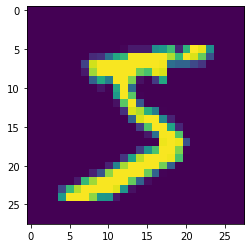

In [108]:
#seeing the image
plt.imshow(x_train[0])

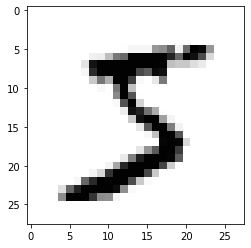

In [109]:
# to chnage the color we can use the cmap
plt.imshow(x_train[0], cmap='Greys')
#differnt colors that can be used
# ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

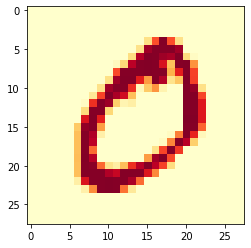

In [110]:
plt.imshow(x_train[1], cmap='YlOrRd')

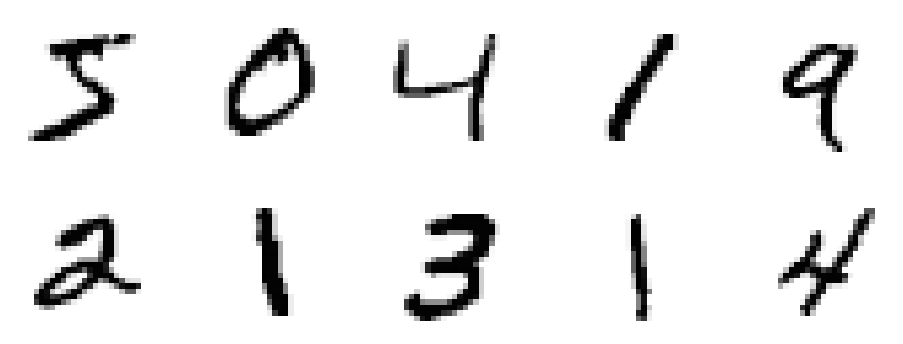

In [111]:
#to see 1st 10 images
plt.figure(figsize=(16,16))
j=1
for i in np.arange(0, 10):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i], cmap='Greys')
  plt.axis('off')

In [112]:
# how to chnage the dimension
x_train.ndim #seeing the dimension


3

In [113]:
#feature scaling
x_train=x_train/255
x_test=x_test/255

In [114]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

In [117]:
X_train.shape, y_train.shape

((48000, 28, 28), (48000,))

In [118]:
X_val.shape, y_val.shape


((12000, 28, 28), (12000,))

In [124]:
from pyparsing import actions
model = tf.keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [125]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [127]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [129]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 3s 11ms/step - loss: 0.4273 - accuracy: 0.8881 - val_loss: 0.1810 - val_accuracy: 0.9442
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1341 - accuracy: 0.9617 - val_loss: 0.1118 - val_accuracy: 0.9678
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0876 - accuracy: 0.9761 - val_loss: 0.0829 - val_accuracy: 0.9758
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0657 - accuracy: 0.9814 - val_loss: 0.0701 - val_accuracy: 0.9792
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0533 - accuracy: 0.9851 - val_loss: 0.0627 - val_accuracy: 0.9813
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0448 - accuracy: 0.9875 - val_loss: 0.0574 - val_accuracy: 0.9832
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0602 - val_accuracy: 0.9825
Epoch 8/10
94/94 [=

model testing

In [131]:
model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 81ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [132]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 32ms/step


7

In [133]:
y_test[0]

7

In [136]:
y_pred=model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [142]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9810


[0.053052790462970734, 0.9810000061988831]

In [145]:
#1st 10 check
for i in np.arange(0, 10):
  our_pred=np.argmax(model.predict(np.expand_dims(x_test[i], axis=0)).round(2))
  print(our_pred, y_test[i])
  if our_pred==y_test[i]:
    print('hey ur model predicted correct')
  else:
    print("oops!! it didnt")

1/1 [==============================] - 0s 21ms/step
7 7
hey ur model predicted correct
1/1 [==============================] - 0s 18ms/step
2 2
hey ur model predicted correct
1/1 [==============================] - 0s 17ms/step
1 1
hey ur model predicted correct
1/1 [==============================] - 0s 19ms/step
0 0
hey ur model predicted correct
1/1 [==============================] - 0s 20ms/step
4 4
hey ur model predicted correct
1/1 [==============================] - 0s 19ms/step
1 1
hey ur model predicted correct
1/1 [==============================] - 0s 20ms/step
4 4
hey ur model predicted correct
1/1 [==============================] - 0s 21ms/step
9 9
hey ur model predicted correct
1/1 [==============================] - 0s 23ms/step
5 5
hey ur model predicted correct
1/1 [==============================] - 0s 17ms/step
9 9
hey ur model predicted correct
